# Importing Libraries

In [392]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score
    

# Loading And Analysis Of The Data

In [393]:
df = pd.read_csv('iris.csv')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [394]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (150, 5)


### Data Information

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [396]:
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [397]:
df['species'].value_counts()


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Checking For Duplicates

In [398]:
duplicate = df.duplicated().sum()

In [399]:
if duplicate > 0:
    df = df.drop_duplicates()

### Checking For Missing Values

In [400]:
nullValues = df.isnull().sum()

nullValues

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [401]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [402]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Plotting 

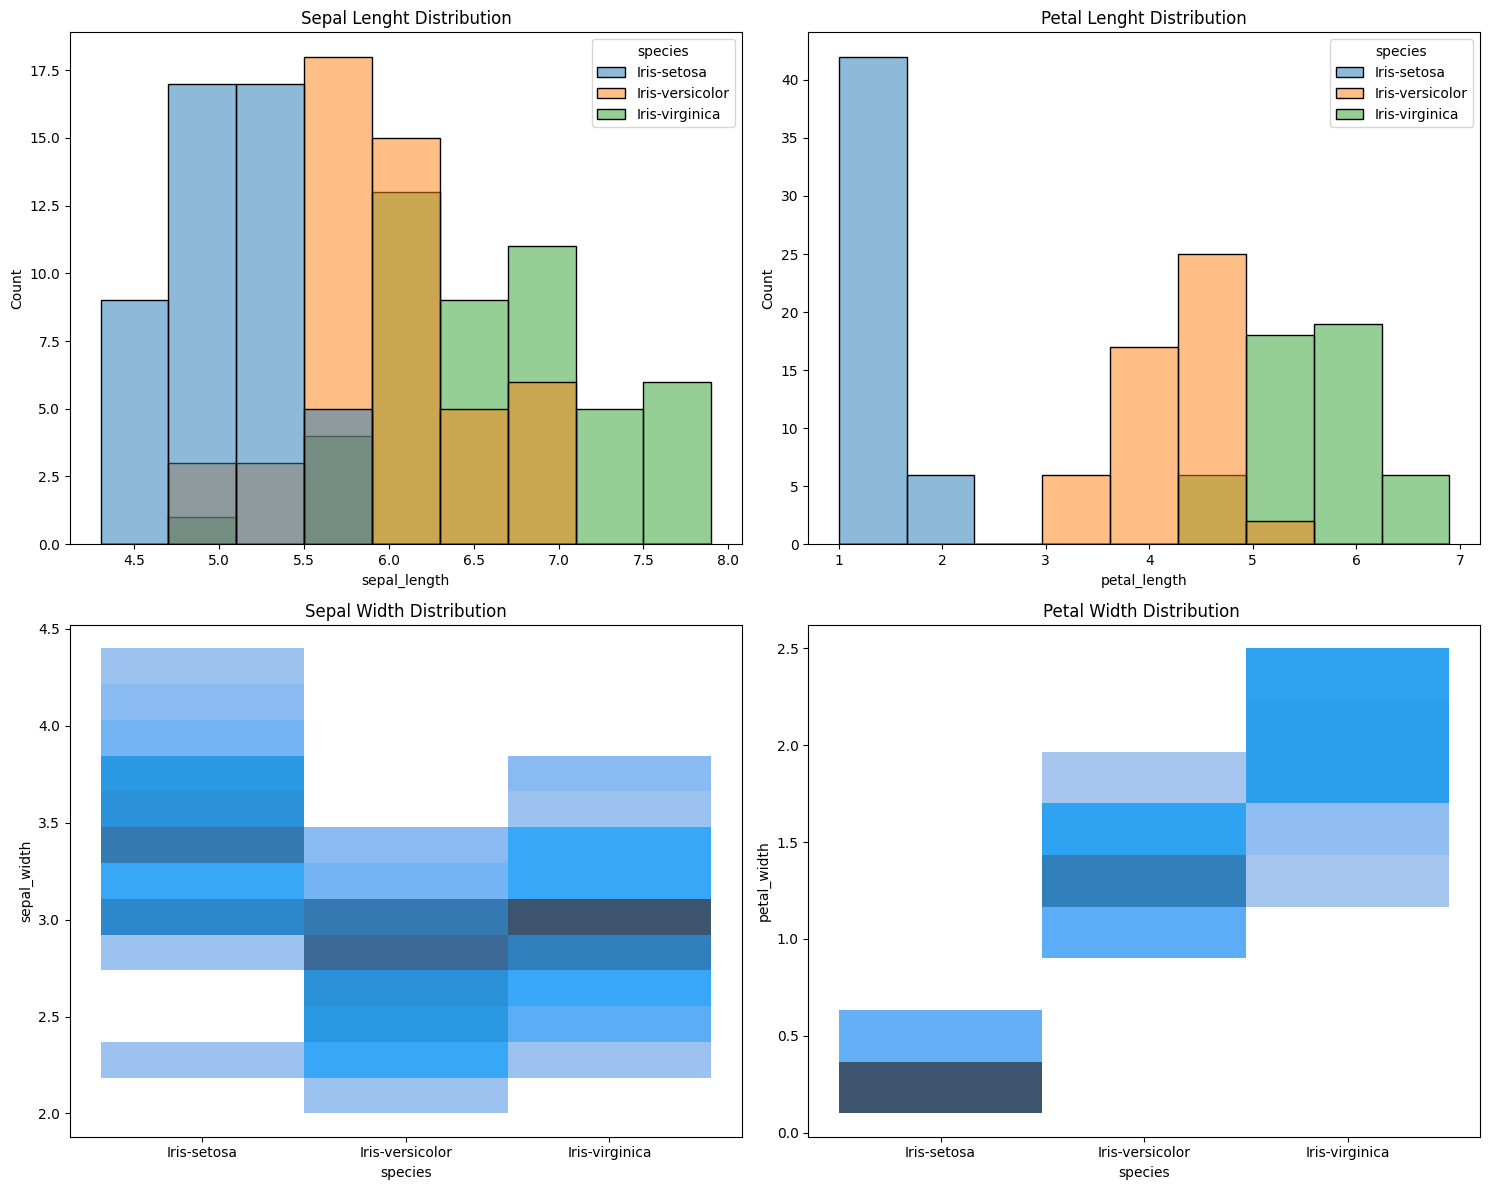

In [403]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.histplot(data=df,
             x='sepal_length',
             hue='species',
             ax=axes[0,0])
axes[0,0].set_title("Sepal Lenght Distribution")

sns.histplot(data=df,
             x='petal_length',
             hue='species',
             ax=axes[0,1])
axes[0,1].set_title("Petal Lenght Distribution")

sns.histplot(data=df,
             x='species',
             y='sepal_width',
             ax=axes[1,0])
axes[1,0].set_title("Sepal Width Distribution")

sns.histplot(data=df, 
             x='species',
             y='petal_width',
             ax=axes[1,1])
axes[1,1].set_title("Petal Width Distribution ")
plt.tight_layout()
plt.show()

# Data Preprocessing

In [404]:
X = df.drop('species', axis=1)
y = df['species']

In [405]:
list(X.columns)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [406]:
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature columns: {list(X.columns)}")
print(f"Unique species: {y.unique()}")

Features shape: (147, 4)
Target shape: (147,)
Feature columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Unique species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### Train Test Split

In [407]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(f"\nLabel encoding mapping:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name}: {i}")

print(f"Encoded target shape: {y_encoded.shape}")
print(f"Encoded target sample: {y_encoded[:10]}")


Label encoding mapping:
Iris-setosa: 0
Iris-versicolor: 1
Iris-virginica: 2
Encoded target shape: (147,)
Encoded target sample: [0 0 0 0 0 0 0 0 0 0]


In [408]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [409]:

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 117
Test set size: 30


### Correlation Matrix

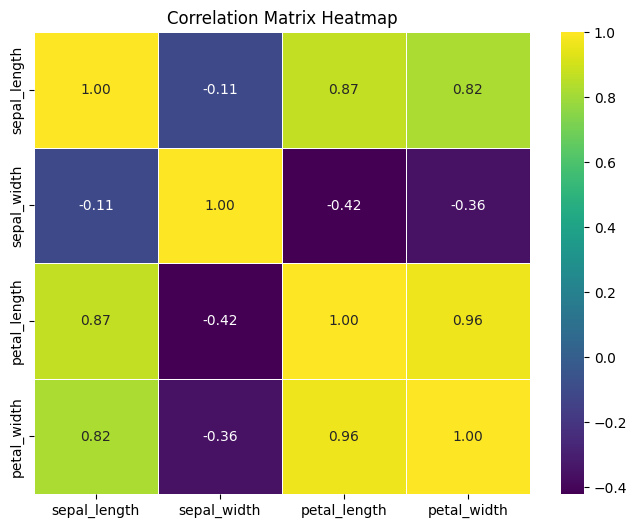

In [410]:
import numpy as np


numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [411]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nFeatures scaled using StandardScaler")


Features scaled using StandardScaler


In [412]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [413]:
y_pred = model.predict(X_test_scaled)
print(f"\nPredictions shape: {y_pred.shape}")
print(f"Predictions: {y_pred}")
print(f"Actual values: {y_test}")


Predictions shape: (30,)
Predictions: [1 1 2 0 2 2 1 0 2 2 0 0 0 1 2 0 1 0 2 0 1 2 0 0 1 1 2 2 2 1]
Actual values: [1 1 2 0 2 1 1 0 2 2 0 0 0 1 2 0 1 0 2 0 1 2 0 0 1 1 2 2 2 1]


In [414]:
acc = accuracy_score(y_test, y_pred)
print(f"\nFinal Test Accuracy: {acc:.4f}")



Final Test Accuracy: 0.9667
